# Первая часть. Исследование

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
import seaborn as sns

## Загрузка данных

In [80]:
data = pd.read_csv('train.csv')

In [ ]:
data.columns

Index(['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'Sex',
       'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService',
       'HasMultiplePhoneNumbers', 'HasInternetService',
       'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection',
       'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription',
       'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod', 'Churn'],
      dtype='object')

In [ ]:
data.head(2)

In [ ]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data.shape

(5282, 20)

In [ ]:
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2294,12,19.30,228.75,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
4676,63,100.55,6215.35,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,1
4776,5,96.25,512.45,Female,0,No,No,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
3690,34,20.10,682.1,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),0
946,54,101.50,5373.1,Female,1,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Credit card (automatic),1


Ищу пропуски в данных:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
for i in data.columns:
    a = data[i].values
    print(i, '', a[np.where(a == ' ')].size)

ClientPeriod  0
MonthlySpending  0
TotalSpent  9
Sex  0
IsSeniorCitizen  0
HasPartner  0
HasChild  0
HasPhoneService  0
HasMultiplePhoneNumbers  0
HasInternetService  0
HasOnlineSecurityService  0
HasOnlineBackup  0
HasDeviceProtection  0
HasTechSupportAccess  0
HasOnlineTV  0
HasMovieSubscription  0
HasContractPhone  0
IsBillingPaperless  0
PaymentMethod  0
Churn  0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


# В колонке TotalSpent строковые значения, 

среди них есть пропуски вида ' ' (9 штук)

## Анализ данных

# количественные признаки

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f727a75c450>,
      dtype=object)

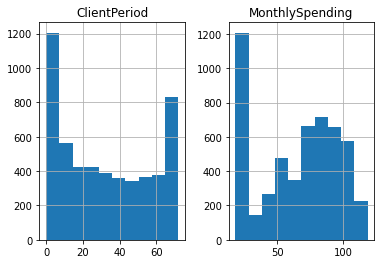

In [ ]:
data[num_cols[:2]].hist()

Видим, что TotalSpent строковый признак, преобразуем его: 

In [ ]:
type(data[num_cols[2]].values[0]), data[num_cols[2]].dtype

(str, dtype('O'))

In [45]:
def str_to_float(str):
    lst = str.split('.')
    if((lst == ['']) | (lst == [' '])):
        return 0
    elif(len(lst) > 1):
        return float(lst[0]) + float(lst[1])/(10**len(lst[1]))
    else:
        return float(lst[0])

In [ ]:
np.sort(data[num_cols[2]].apply(lambda x: str_to_float(x)).values)[:20]

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
       18.8 , 18.9 , 19.05, 19.1 , 19.1 , 19.1 , 19.15, 19.2 , 19.2 ,
       19.2 , 19.25])

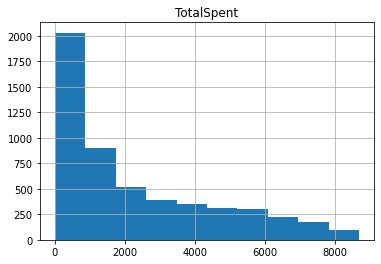

In [ ]:
plt.title('TotalSpent')
data[num_cols[2]].apply(lambda x: str_to_float(x)).hist()

# категориальные признаки

In [ ]:
for i in cat_cols:
    print(i, '\n', data[i].value_counts(), '\n')

Sex 
 Male      2655
Female    2627
Name: Sex, dtype: int64 

IsSeniorCitizen 
 0    4440
1     842
Name: IsSeniorCitizen, dtype: int64 

HasPartner 
 No     2705
Yes    2577
Name: HasPartner, dtype: int64 

HasChild 
 No     3676
Yes    1606
Name: HasChild, dtype: int64 

HasPhoneService 
 Yes    4761
No      521
Name: HasPhoneService, dtype: int64 

HasMultiplePhoneNumbers 
 No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64 

HasInternetService 
 Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64 

HasOnlineSecurityService 
 No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64 

HasOnlineBackup 
 No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64 

HasDeviceProtection 
 No                     2317
Yes                    1824
N

Категориальные признаки:

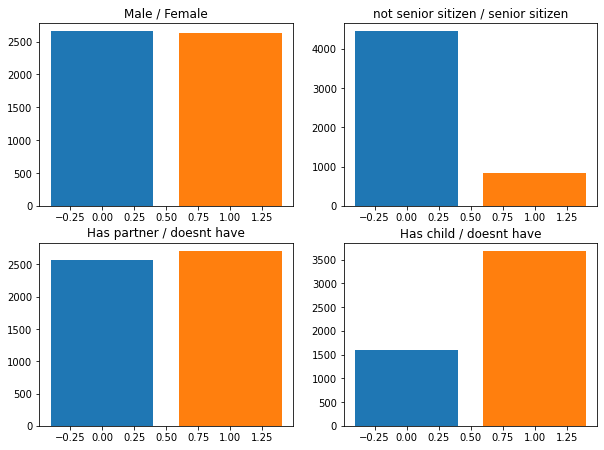

In [ ]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].set_title('Male / Female')
axs[0, 0].bar([0], list(data[cat_cols[0]].values).count('Male'))
axs[0, 0].bar([1], list(data[cat_cols[0]].values).count('Female'))

axs[0, 1].set_title('not senior sitizen / senior sitizen')
axs[0, 1].bar([0], list(data[cat_cols[1]].values).count(0))
axs[0, 1].bar([1], list(data[cat_cols[1]].values).count(1))

axs[1, 0].set_title('Has partner / doesnt have')
axs[1, 0].bar([0], list(data[cat_cols[2]].values).count('Yes'))
axs[1, 0].bar([1], list(data[cat_cols[2]].values).count('No'))

axs[1, 1].set_title('Has child / doesnt have')
axs[1, 1].bar([0], list(data[cat_cols[3]].values).count('Yes'))
axs[1, 1].bar([1], list(data[cat_cols[3]].values).count('No'))

fig.set_size_inches(10, 4)
plt.subplots_adjust(None, 0.7, None, 2.1)

Еще один график для признаков:

In [ ]:
# функция для надписи
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return "{p:.2f}%".format(p=pct, v=val)  #   ({v:d})
    return my_autopct

In [ ]:
cols = 2
rows = len(cat_cols) // cols+1

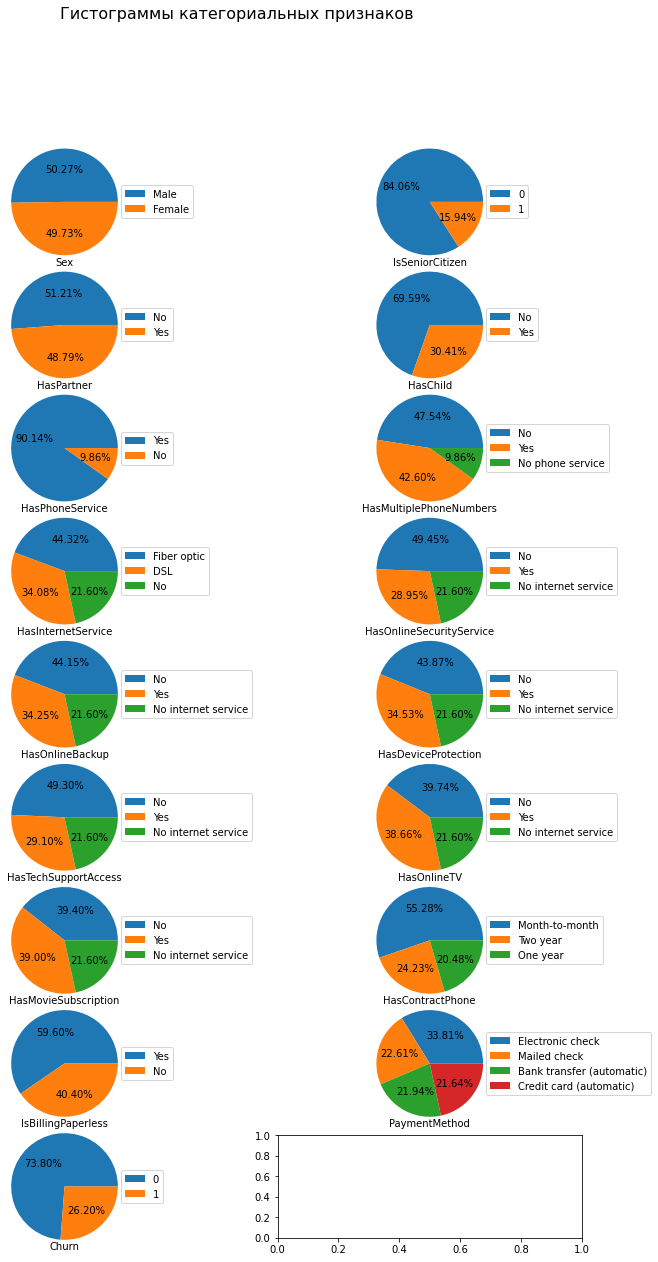

In [ ]:
fig, axs = plt.subplots(rows, cols, sharey=False)

for cat_col, ax in zip(cat_cols+[target_col], axs.ravel()):
    val_counts = data[cat_col].value_counts()
    wedges, _, _ = ax.pie(
        x=val_counts.values,
        autopct=make_autopct(val_counts.values),
        radius=1.3,
    )
    ax.legend(wedges, val_counts.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    ax.set_xlabel(cat_col)


fig.set_figwidth(12)  # inches
fig.set_figheight(20)  # inches
fig.suptitle("""Гистограммы категориальных признаков""", fontsize=16) 
plt.show()

## Применение линейных моделей

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

предобрабатываю данные

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

# Смотрю на корреляцию признаков после OneHotEncoding

замечаю, что появились одинаковые колонки -> удаляю их

In [ ]:
pd.get_dummies(X[cat_cols]).corr().style.background_gradient(cmap='coolwarm')

,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
IsSeniorCitizen,1.000000,-0.013207,0.013207,-0.016764,0.016764,0.217007,-0.217007,-0.008763,0.008763,-0.128706,-0.008763,0.135267,-0.102503,0.247603,-0.180831,0.180638,-0.180831,-0.035052,0.084633,-0.180831,0.068258,0.103860,-0.180831,0.048119,0.198516,-0.180831,-0.054669,0.047982,-0.180831,0.104599,0.028863,-0.180831,0.123656,0.143054,-0.051876,-0.117132,-0.151964,0.151964,-0.010942,-0.027889,0.169778,-0.153740
Sex_Female,-0.013207,1.000000,-1.000000,0.002780,-0.002780,0.014605,-0.014605,-0.007771,0.007771,0.001634,-0.007771,0.003035,0.002214,0.002824,-0.005958,-0.006874,-0.005958,0.012985,-0.002150,-0.005958,0.007417,0.002778,-0.005958,0.002257,-0.009920,-0.005958,0.016317,-0.010010,-0.005958,0.015094,-0.003862,-0.005958,0.008897,-0.000198,-0.012321,0.011835,-0.015698,0.015698,0.009673,0.006924,-0.003415,-0.012525
Sex_Male,0.013207,-1.000000,1.000000,-0.002780,0.002780,-0.014605,0.014605,0.007771,-0.007771,-0.001634,0.007771,-0.003035,-0.002214,-0.002824,0.005958,0.006874,0.005958,-0.012985,0.002150,0.005958,-0.007417,-0.002778,0.005958,-0.002257,0.009920,0.005958,-0.016317,0.010010,0.005958,-0.015094,0.003862,0.005958,-0.008897,0.000198,0.012321,-0.011835,0.015698,-0.015698,-0.009673,-0.006924,0.003415,0.012525
HasPartner_No,-0.016764,0.002780,-0.002780,1.000000,-1.000000,0.442530,-0.442530,0.001508,-0.001508,0.132024,0.001508,-0.134243,-0.003045,0.006202,-0.003981,0.133596,-0.003981,-0.143668,0.131761,-0.003981,-0.134424,0.150691,-0.003981,-0.153821,0.113977,-0.003981,-0.121847,0.120020,-0.003981,-0.117244,0.121143,-0.003981,-0.118002,0.276996,-0.076119,-0.249716,-0.005293,0.005293,-0.113065,-0.077583,0.085955,0.091035
HasPartner_Yes,0.016764,-0.002780,0.002780,-1.000000,1.000000,-0.442530,0.442530,-0.001508,0.001508,-0.132024,-0.001508,0.134243,0.003045,-0.006202,0.003981,-0.133596,0.003981,0.143668,-0.131761,0.003981,0.134424,-0.150691,0.003981,0.153821,-0.113977,0.003981,0.121847,-0.120020,0.003981,0.117244,-0.121143,0.003981,0.118002,-0.276996,0.076119,0.249716,0.005293,-0.005293,0.113065,0.077583,-0.085955,-0.091035
HasChild_No,0.217007,0.014605,-0.014605,0.442530,-0.442530,1.000000,-1.000000,-0.010475,0.010475,-0.024334,-0.010475,0.030892,-0.050978,0.174634,-0.152092,0.198537,-0.152092,-0.080863,0.141769,-0.152092,-0.016453,0.129790,-0.152092,-0.003817,0.177608,-0.152092,-0.057694,0.104460,-0.152092,0.023557,0.093267,-0.152092,0.034888,0.228322,-0.069361,-0.199604,-0.100777,0.100777,-0.043363,-0.060437,0.146189,-0.062937
HasChild_Yes,-0.217007,-0.014605,0.014605,-0.442530,0.442530,-1.000000,1.000000,0.010475,-0.010475,0.024334,0.010475,-0.030892,0.050978,-0.174634,0.152092,-0.198537,0.152092,0.080863,-0.141769,0.152092,0.016453,-0.129790,0.152092,0.003817,-0.177608,0.152092,0.057694,-0.104460,0.152092,-0.023557,-0.093267,0.152092,-0.034888,-0.228322,0.069361,0.199604,0.100777,-0.100777,0.043363,0.060437,-0.146189,0.062937
HasPhoneService_No,-0.008763,-0.007771,0.0

In [ ]:
ser = pd.get_dummies(X[cat_cols]).corr()['HasInternetService_No']
ser[ser == 1]

HasInternetService_No                           1.0
HasOnlineSecurityService_No internet service    1.0
HasOnlineBackup_No internet service             1.0
HasDeviceProtection_No internet service         1.0
HasTechSupportAccess_No internet service        1.0
HasOnlineTV_No internet service                 1.0
HasMovieSubscription_No internet service        1.0
Name: HasInternetService_No, dtype: float64

In [ ]:
the_same_cols = list(ser[ser == 1].index)[1:] + ['HasMultiplePhoneNumbers_No phone service'] #коррелирующие колонки(одинаковые) - the same cols

In [ ]:
print(pd.get_dummies(X[cat_cols]).drop(the_same_cols, axis=1).corr().shape)

(35, 35)


Убрал все одинаковые колонки (видно из таблицы ниже - красные ячейки только на диагонали)

In [ ]:
pd.get_dummies(X[cat_cols]).drop(the_same_cols, axis=1).corr().style.background_gradient(cmap='coolwarm')

,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
IsSeniorCitizen,1.000000,-0.013207,0.013207,-0.016764,0.016764,0.217007,-0.217007,-0.008763,0.008763,-0.128706,0.135267,-0.102503,0.247603,-0.180831,0.180638,-0.035052,0.084633,0.068258,0.103860,0.048119,0.198516,-0.054669,0.047982,0.104599,0.028863,0.123656,0.143054,-0.051876,-0.117132,-0.151964,0.151964,-0.010942,-0.027889,0.169778,-0.153740
Sex_Female,-0.013207,1.000000,-1.000000,0.002780,-0.002780,0.014605,-0.014605,-0.007771,0.007771,0.001634,0.003035,0.002214,0.002824,-0.005958,-0.006874,0.012985,-0.002150,0.007417,0.002778,0.002257,-0.009920,0.016317,-0.010010,0.015094,-0.003862,0.008897,-0.000198,-0.012321,0.011835,-0.015698,0.015698,0.009673,0.006924,-0.003415,-0.012525
Sex_Male,0.013207,-1.000000,1.000000,-0.002780,0.002780,-0.014605,0.014605,0.007771,-0.007771,-0.001634,-0.003035,-0.002214,-0.002824,0.005958,0.006874,-0.012985,0.002150,-0.007417,-0.002778,-0.002257,0.009920,-0.016317,0.010010,-0.015094,0.003862,-0.008897,0.000198,0.012321,-0.011835,0.015698,-0.015698,-0.009673,-0.006924,0.003415,0.012525
HasPartner_No,-0.016764,0.002780,-0.002780,1.000000,-1.000000,0.442530,-0.442530,0.001508,-0.001508,0.132024,-0.134243,-0.003045,0.006202,-0.003981,0.133596,-0.143668,0.131761,-0.134424,0.150691,-0.153821,0.113977,-0.121847,0.120020,-0.117244,0.121143,-0.118002,0.276996,-0.076119,-0.249716,-0.005293,0.005293,-0.113065,-0.077583,0.085955,0.091035
HasPartner_Yes,0.016764,-0.002780,0.002780,-1.000000,1.000000,-0.442530,0.442530,-0.001508,0.001508,-0.132024,0.134243,0.003045,-0.006202,0.003981,-0.133596,0.143668,-0.131761,0.134424,-0.150691,0.153821,-0.113977,0.121847,-0.120020,0.117244,-0.121143,0.118002,-0.276996,0.076119,0.249716,0.005293,-0.005293,0.113065,0.077583,-0.085955,-0.091035
HasChild_No,0.217007,0.014605,-0.014605,0.442530,-0.442530,1.000000,-1.000000,-0.010475,0.010475,-0.024334,0.030892,-0.050978,0.174634,-0.152092,0.198537,-0.080863,0.141769,-0.016453,0.129790,-0.003817,0.177608,-0.057694,0.104460,0.023557,0.093267,0.034888,0.228322,-0.069361,-0.199604,-0.100777,0.100777,-0.043363,-0.060437,0.146189,-0.062937
HasChild_Yes,-0.217007,-0.014605,0.014605,-0.442530,0.442530,-1.000000,1.000000,0.010475,-0.010475,0.024334,-0.030892,0.050978,-0.174634,0.152092,-0.198537,0.080863,-0.141769,0.016453,-0.129790,0.003817,-0.177608,0.057694,-0.104460,-0.023557,-0.093267,-0.034888,-0.228322,0.069361,0.199604,0.100777,-0.100777,0.043363,0.060437,-0.146189,0.062937
HasPhoneService_No,-0.008763,-0.007771,0.007771,0.001508,-0.001508,-0.010475,0.010475,1.000000,-1.000000,-0.314902,-0.284968,0.460095,-0.295137,-0.173644,0.053796,0.098260,0.100987,0.044911,0.079918,0.066884,0.048450,0.103995,0.121914,0.024230,0.120504,0.025785,0.005083,-0.002714,-0.003342,0.021362,-0.021362,-0.014299,0.006566,-0.002906,0.010971
HasPhoneService_Yes,0.008763,0.007771,-0.007771,-0.001508,0.001508,0.010475,-0.010475,-1.000000,1.000000,0.314902,0.284968,-0.460095,0.295137,0.173644,-0.053796,-0.098260,-0.100987,-0.044911,-0.079918,-0.066884,-0.048450,-0.103995,-0.121914,-0.024230,-0.120504,-0.025785,-0.005083,0.002714,0.003342,-0.021362,0.021362,0.014299,-0.006566,0.002906,-0.010971
HasMultiplePhoneNumbers_No,-0.128706,0.001634,-0.001634,0.132024,-0.132024,-0.02433

# Все преобразования выше оформил в отдельную функцию

In [ ]:
def my_preprocess(data):
  new_data = data.copy()
  new_data[num_cols[2]] = new_data[num_cols[2]].apply(lambda x: str_to_float(x))

  ser = pd.get_dummies(new_data[cat_cols]).corr()['HasInternetService_No']
  the_same_cols = list(ser[ser == 1].index)[1:] + ['HasMultiplePhoneNumbers_No phone service']

  cat_data = pd.get_dummies(data[cat_cols]).drop(the_same_cols, axis=1)
  new_data = pd.concat([new_data, cat_data], axis=1)
  new_data.drop(cat_cols, axis=1, inplace=True)

  return new_data

Видно, что число классов несбалансировано -> используем метрику roc_auc

In [ ]:
data['Churn'].value_counts()

0    3898
1    1384
Name: Churn, dtype: int64

# Логистическая Регрессия на кросс валидации

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

X_new - датасет с one_hot_encoding

In [ ]:
new_data = my_preprocess(data)

In [ ]:
X_new = new_data.loc[:, new_data.columns != 'Churn']
y_new = new_data['Churn']

In [ ]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

ищу оптимальные параметры c помощью GridSearch

In [ ]:
def linear_model_score(X, y, my_model, param_grid):
  my_grid = GridSearchCV(my_model, param_grid, scoring='roc_auc', cv=10, n_jobs=-1)
  my_grid.fit(X, y)

  return (my_grid.best_params_, my_grid.best_score_, my_grid.best_estimator_)

In [ ]:
params = linear_model_score(X_new_train, y_new_train, LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty':['l1', 'l2']})

In [ ]:
print(params[0], params[1])

{'C': 0.1, 'penalty': 'l2'} 0.8475988346406351


In [ ]:
roc_auc_score(y_new_test, params[2].predict_proba(X_new_test)[:, 1])

0.8224988686842567

пробую нормировать признаки

In [ ]:
my_scaler = StandardScaler()

In [ ]:
X_new_train_scaled = X_new_train.copy(deep=True)

In [ ]:
X_new_train_scaled[num_cols] = my_scaler.fit_transform(X_new_train[num_cols])

In [ ]:
norm_params = linear_model_score(X_new_train_scaled, y_new_train, LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty':['l1', 'l2']})

In [ ]:
print(norm_params[0], norm_params[1])

X_new_test_scaled = X_new_test.copy()
X_new_test_scaled[num_cols] = my_scaler.transform(X_new_test[num_cols])
print(roc_auc_score(y_new_test, norm_params[2].predict_proba(X_new_test_scaled)[:, 1]))

{'C': 100, 'penalty': 'l2'} 0.8490988501880784
0.8267932508935085


как видно, нормализация признаков уменьшила коэффициент регуляризации (то есть увеличила С)

Скор тоже увеличился 0.822 -> 0.826

# Пробую KNN

подберу гиперпараметры с помощью GridSearcCV, попробую разные нормализаторы

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25, random_state=42, shuffle=True)

In [ ]:
parameters = {'n_neighbors': np.arange(40, 80, 3), 
              'metric': ['cosine', 'euclidean'], 
              'weights': ['uniform', 'distance', 'manhatten']}

In [ ]:
my_grid = GridSearchCV(KNeighborsClassifier(), parameters, scoring='roc_auc', cv=5, n_jobs=-1)

пробую StandardScaler

In [ ]:
my_scaler = StandardScaler()
my_scaler.fit(X_train[num_cols])
X_train_st_scaled = X_train.copy()
X_train_st_scaled[num_cols] = my_scaler.transform(X_train[num_cols])

my_grid.fit(X_train_st_scaled, y_train)

In [ ]:
print(my_grid.best_score_, my_grid.best_params_)

X_test_st_scaled = X_test.copy()
X_test_st_scaled[num_cols] = my_scaler.transform(X_test[num_cols])
y_pred = my_grid.best_estimator_.predict_proba(X_test_st_scaled)[:, 1]
print('test_score:', roc_auc_score(y_test, y_pred))

0.8424603217355825 {'metric': 'euclidean', 'n_neighbors': 64, 'weights': 'uniform'}
test_score: 0.8126059243976127


пробую MinMaxScaler

In [ ]:
my_scaler = MinMaxScaler()
my_scaler.fit(X_train[num_cols])
X_train_st_scaled = X_train.copy()
X_train_st_scaled[num_cols] = my_scaler.transform(X_train[num_cols])

my_grid.fit(X_train_st_scaled, y_train)

In [ ]:
print(my_grid.best_score_, my_grid.best_params_)

X_test_st_scaled = X_test.copy()
X_test_st_scaled[num_cols] = my_scaler.transform(X_test[num_cols])
y_pred = my_grid.best_estimator_.predict_proba(X_test_st_scaled)[:, 1]
print('test_score:', roc_auc_score(y_test, y_pred))

0.8363147253107165 {'metric': 'cosine', 'n_neighbors': 40, 'weights': 'uniform'}
test_score: 0.8031448800137548


StandardScaler и KNN очень неплохо себя показали: 0.8126059243976127

# Пробую SVM

попробую поэкспериментировать с ядрами

In [ ]:
from sklearn.svm import SVC

In [ ]:
my_svm = SVC()

In [ ]:
svm_params = {'C': [100, 10, 1, 0.1, 0.01, 0.001], 
          'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
          'degree': np.arange(1, 5), 
          'probability': [True]       
          }

svm_grid = GridSearchCV(my_svm, svm_params, scoring='roc_auc', cv=5, n_jobs=-1)

In [ ]:
svm_grid.fit(X_train_st_scaled, y_train)

In [ ]:
best_params_copy = dict({'C': 0.1, 'degree': 1, 'kernel': 'linear', 'probability': True})
best_score_copy = 0.8403102016014904

In [ ]:
print(svm_grid.best_score_, svm_grid.best_params_)

y_pred = svm_grid.best_estimator_.predict_proba(X_test_st_scaled)[:, 1]
print('test_score:', roc_auc_score(y_test, y_pred))

0.8403102016014904 {'C': 0.1, 'degree': 1, 'kernel': 'linear', 'probability': True}
test_score: 0.8174369980104635


в целом SVM оказался почти не хуже лог регрессии

# Пробую Decision Trees

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import KFold
from tqdm.notebook import tqdm

In [ ]:
def RForest_score(X_train, y_train, max_trees):
  values = np.arange(max_trees) + 1

  kf = KFold(n_splits=5, shuffle=True, random_state=1234)

  global_scores = []

  for train_indices, val_indices in tqdm(kf.split(X_train), total=5):
      scores = []
      
      X_train_kf = X_train.iloc[train_indices, :]
      y_train_kf = y_train.iloc[train_indices, :]
      
      X_val_kf = X_train.iloc[val_indices, :]
      y_val_kf = y_train.iloc[val_indices, :]
      
      forest = RandomForestClassifier(n_estimators=max_trees)
      forest.fit(X_train_kf, y_train_kf)
      trees = forest.estimators_
      
      for number_of_trees in tqdm(values, leave=False):
          thinned_forest = RandomForestClassifier(n_estimators=number_of_trees)
          
          thinned_forest.n_classes_ = 2
          thinned_forest.estimators_ = trees[:number_of_trees]

          scores.append(roc_auc_score(y_val_kf, thinned_forest.predict_proba(X_val_kf)[:, 1]))
      
      scores = np.array(scores)
      
      global_scores.append(scores)

  global_scores = np.stack(global_scores, axis=0)
  return global_scores

# Рисую график

In [ ]:
def scores_plot(global_scores, max_trees):
  mean_cross_val_score = global_scores.mean(axis=0)
  std_cross_val_score = global_scores.std(axis=0)

  values = np.arange(max_trees) + 1

  plt.figure(figsize=(15,8))
  plt.grid(True)
  plt.title('Quality of random forest')

  plt.plot(values, mean_cross_val_score, label='mean values', color='red', lw=3)
  plt.fill_between(values, 
                  mean_cross_val_score - 2 * std_cross_val_score, 
                  mean_cross_val_score + 2 * std_cross_val_score, 
                  color='green', 
                  label='filled area between errors',
                  alpha=0.5)
  legend_box = plt.legend(framealpha=1).get_frame()
  legend_box.set_facecolor("white")
  legend_box.set_edgecolor("black")
  plt.xlabel('number of trees')
  plt.ylabel('roc-auc')

  plt.show()

In [ ]:
score = RForest_score(X_train, y_train, 100)

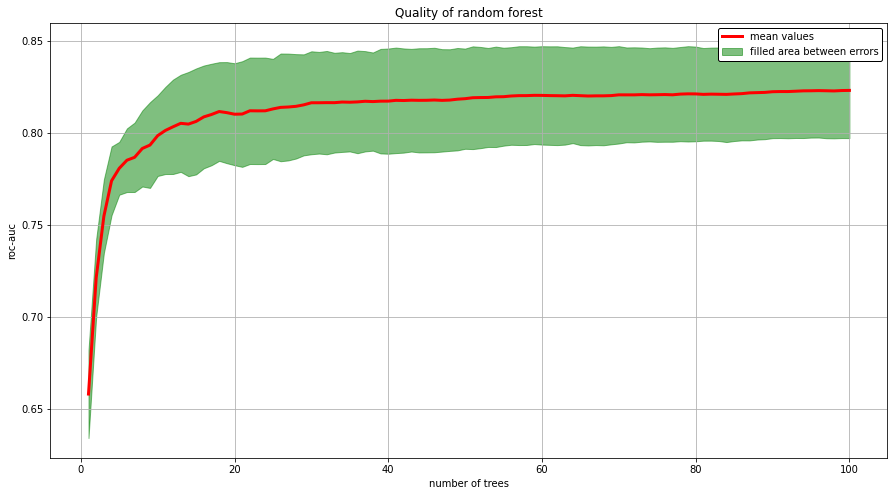

In [ ]:
scores_plot(score, 100)

Попробую снова воспользоваться скэйлером и посмотреть результат

In [ ]:
X_train_scaled = X_train.copy()

In [ ]:
X_train_scaled[num_cols] = StandardScaler().fit_transform(X_train_scaled[num_cols])

In [ ]:
max_trees = 150
score = RForest_score(X_train_scaled, y_train, max_trees)

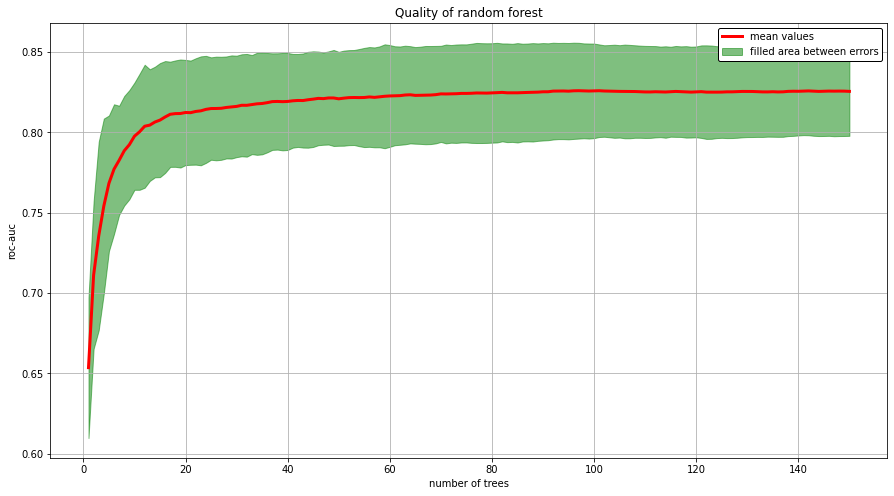

In [ ]:
scores_plot(score, max_trees)

как и ожидалось, нормировка признаков никак не повлияла на качество случайного леса

# Обучим случайный лес со 100 деревьями и посмотрим на качество

In [ ]:
my_forest = RandomForestClassifier(n_estimators=100)
my_forest.fit(X_train, y_train)

In [ ]:
print(roc_auc_score(y_test, my_forest.predict_proba(X_test)[:, 1]))

0.798650001228109


качество оказалось весьма небольшим, возможно, потому что обучил случайный лес на разреженной таблице данных после OneHotEncoding

# Пробую CatBoost

In [ ]:
!pip install catboost

In [36]:
import catboost

In [35]:
from catboost import CatBoostClassifier

In [ ]:
X_origin, y_origin = X, y

In [ ]:
X_train_origin, X_test_origin, y_train_origin, y_test_origin = train_test_split(X_origin, y_origin, test_size=0.2, random_state=42)

In [ ]:
categorical_indicies = np.arange(3, X_origin.shape[1])

In [37]:
cat_boost_model = CatBoostClassifier(n_estimators=200, cat_features=categorical_indicies)

In [ ]:
cat_boost_model.fit(X_train_origin, y_train_origin)

In [ ]:
y_pred = cat_boost_model.predict_proba(X_test_origin)[:, 1]
print('test_score', roc_auc_score(y_test_origin, y_pred))

test_score 0.8228013224850159


в целом очень неплохой скор на тесте (сразу из коробки)

в самом конце ноутбука подберу лучшие гиперпараметры для CatBoost 

# Стекинг Моделей

попробую объединить все модели, что я подобрал выше, то есть:

LogReg, KNN, SVM, RForest

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
def compute_meta_feature(model, X_train, X_test, y_train, cv):
    try:
        train_answers = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba')[:, 1]
        model.fit(X_train, y_train)
        return train_answers, model.predict_proba(X_test)[:, 1]
    
    except Exception:
        train_answers = cross_val_predict(model, X_train, y_train, cv=cv, method='predict')[:, 1]
        model.fit(X_train, y_train)
        return train_answers, model.predict(X_test)[:, 1]

обязательно надо не забыть нормировать признаки через Standard Scaler

именно на нем Knn дал хороший результат

In [ ]:
models = []
models.append(KNeighborsClassifier(metric='euclidean', n_neighbors=64, weights='uniform'))
models.append(LogisticRegression(C=100, penalty='l2'))
models.append(SVC(C=0.1, degree= 1, kernel='linear', probability=True))
models.append(RandomForestClassifier(n_estimators=100, n_jobs=-1))

In [ ]:
meta_features_train = np.zeros((X_new_train.shape[0], 0))
meta_features_test = np.zeros((X_new_test.shape[0], 0))

In [ ]:
for model in models:
    train, test = compute_meta_feature(model, X_new_train_scaled, X_new_test_scaled, y_new_train, 5)
    meta_features_train = np.append(meta_features_train, train.reshape((train.size, 1)), axis=1)
    meta_features_test = np.append(meta_features_test, test.reshape((test.size, 1)), axis=1)

In [ ]:
data.shape, meta_features_train.shape, y_new_train.shape

((5282, 20), (4225, 9), (4225,))

In [ ]:
stacking_model = LogisticRegression()
stacking_model.fit(meta_features_train, y_new_train)

y_train_predicted = stacking_model.predict_proba(meta_features_train)[:, 1]
y_test_predicted = stacking_model.predict_proba(meta_features_test)[:, 1]

In [ ]:
test_auc = roc_auc_score(y_new_test, y_test_predicted)

In [ ]:
print(test_auc)

0.8264977235156675


Пока нет видимого результата

## Пробую настроить XGBoost

в этом препроцессинге не удалаяю одинаковые колонки после OneHotEncoding

In [79]:
def my_preprocess2(data):
  new_data = data.copy(deep=True)
  new_data[num_cols[2]] = new_data[num_cols[2]].apply(lambda x: str_to_float(x))

  cat_data = pd.get_dummies(data[cat_cols])
  new_data = pd.concat([new_data, cat_data], axis=1)
  new_data.drop(cat_cols, axis=1, inplace=True)

  return new_data

In [ ]:
import xgboost

In [ ]:
def auc_boost_plot(X_train, X_test, y_train, y_test):
  score = []
  for i in range(1, 100, 3):
    my_boost = xgboost.XGBClassifier(n_estimators=i)
    my_boost.fit(X_train, y_train)
    score += [roc_auc_score(y_test, my_boost.predict_proba(X_test)[:, 1])]

  max_score = np.max(np.array(score))
  print(max_score, np.arange(1, 100, 3)[np.where(np.array(score) == max_score)])

  plt.plot(np.arange(1, 100, 3), score)

0.827670597796474 [40]


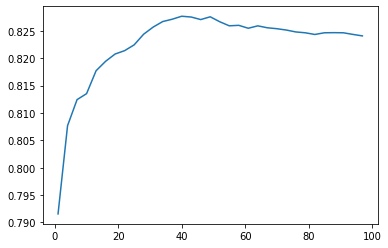

In [ ]:
auc_boost_plot(X_new_train, X_new_test, y_train, y_test)

In [ ]:
def auc_grid(X, y, min_tree_cnt, max_tree_cnt, step, lr):
  my_boost = xgboost.XGBClassifier()
  grid = {'n_estimators': np.arange(min_tree_cnt, max_tree_cnt, step), 'learning_rate': [lr]}
  my_grid = GridSearchCV(my_boost, grid, scoring='roc_auc', cv=5, n_jobs=-1)

  my_grid.fit(X, y)
  print(my_grid.best_params_, my_grid.best_score_)

  plt.plot(np.arange(min_tree_cnt, max_tree_cnt, step), my_grid.cv_results_['mean_test_score'])

  return my_grid.best_estimator_

нормализация сделала даже чуть хуже (это нормально для деревьев)

In [ ]:
data1 = my_preprocess2(data)
X1 = data1.loc[:, data1.columns != 'Churn']
y1 = data1['Churn']

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X1, y1, test_size=0.2, random_state=42)

попробую маленький шаг градиентного бустинга

{'learning_rate': 0.01, 'n_estimators': 421} 0.8506575750258702


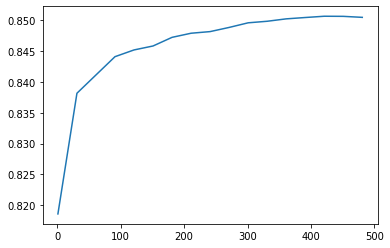

In [ ]:
#auc_grid(X, y, min_tree_cnt, max_tree_cnt, step, lr)
my_boost = auc_grid(X_tr, y_tr, 1, 500, 30, 0.01)

In [ ]:
#X_te[num_cols] = my_scaler.transform(X_te[num_cols])
roc_auc_score(y_te, my_boost.predict_proba(X_te)[:, 1])

0.8264423121323223

пробую шаг ещё поменьше (не дало результата)

{'learning_rate': 0.001, 'n_estimators': 1180} 0.8452192912152112


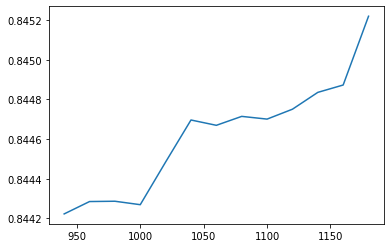

In [ ]:
#auc_grid(X, y, min_tree_cnt, max_tree_cnt, step, lr)
my_boost = auc_grid(X_tr, y_tr, 940, 1200, 20, 0.001)

In [ ]:
roc_auc_score(y_te, my_boost.predict_proba(X_te)[:, 1])

0.8162720144808415

# Пробую залить решение на кэгл

по этогу лучший мой результат - градиентный бустинг с обычным шагом (примерно 22 дерева)

На кросс валидации - 0.85, на тесте  - 0.827

данные - ван хот енкодинг (не убираю одинаковый столбцы после OHE)

данные не нормализую 

{'learning_rate': 0.2, 'n_estimators': 22} 0.8498411281264374


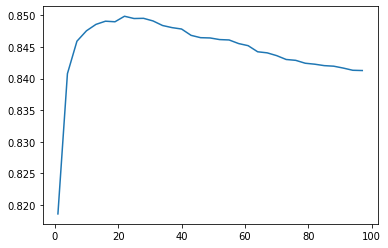

In [ ]:
#auc_grid(X, y, min_tree_cnt, max_tree_cnt, step, lr)
my_boost = auc_grid(X_tr, y_tr, 1, 100, 3, 0.2)

In [ ]:
roc_auc_score(y_te, my_boost.predict_proba(X_te)[:, 1])

0.8244844432541257

# загружаю kaggle_test

In [ ]:
files.upload()

In [ ]:
!ls

sample_data  test.csv  train.csv


In [ ]:
best_boost = xgboost.XGBClassifier(n_estimators=22, learning_rate=0.2)

In [ ]:
best_boost.fit(X1, y1)

XGBClassifier(learning_rate=0.2, n_estimators=22)

In [77]:
data_test = pd.read_csv('test.csv')

In [75]:
def submit(best_model, kaggle_test, my_preprocess, filename):
  kaggle_preprocessed = my_preprocess(kaggle_test)
  kaggle_pred = best_model.predict_proba(kaggle_preprocessed)[:, 1]
  kagle_submit = pd.DataFrame({'Id': np.arange(kaggle_test.shape[0]), 
                             'Churn': kaggle_pred})
  kagle_submit.to_csv(filename, index=False)

In [ ]:
submit(best_boost, data_test, my_preprocess2, 'grad_boost2.csv')

# Попробую сделать сабмит для Лог. регрессии

лучший результат - OHE с удалёнными одинаковыми столбцами

данные не нормализую

на тесте - 0.8491, на отложенной 0.8271

X_new - полная обучающая выборка с препроцессингом

In [ ]:
best_LogReg = LogisticRegression(C=10, penalty='l2')

In [ ]:
best_LogReg.fit(X_new, y.values)

In [ ]:
submit(best_LogReg, data_test, my_preprocess, 'log_reg_sumbit.csv')

# Сабмит для stacking model:

**получаю метапризнаки из полной обучающей выборки X_new**

надо не забыть нормировать её

In [ ]:
def compute_all_meta_feature(model, X_train, X_test, y_train, cv):
    train_answers = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba')[:, 1]
    model.fit(X_train, y_train)
    return train_answers, model.predict_proba(X_test)[:, 1]

нормирую полную обучающую выборку (и kagle_test тоже)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_new[num_cols])

StandardScaler()

In [ ]:
X_new_scaled = X_new.copy()
X_new_scaled[num_cols] = scaler.transform(X_new[num_cols])

In [ ]:
all_meta_features_train = np.zeros((X_new.shape[0], 0))

meta_features_test = np.zeros((data_test.shape[0], 0))

нормирую тестовую выборку с кэгла

In [ ]:
data_test_scaled = data_test.copy()
data_test_scaled = my_preprocess(data_test)
data_test_scaled[num_cols] = scaler.transform(data_test_scaled[num_cols])

In [ ]:
for model in models:
    train, test = compute_all_meta_feature(model, X_new_scaled, data_test_scaled, y_new, 5)
    all_meta_features_train = np.append(all_meta_features_train, train.reshape((train.size, 1)), axis=1)
    meta_features_test = np.append(meta_features_test, test.reshape((test.size, 1)), axis=1)

In [ ]:
all_meta_features_train.shape

(5282, 4)

In [ ]:
final_stacking_model = LogisticRegression()

In [ ]:
final_stacking_model.fit(all_meta_features_train, y_new)

LogisticRegression()

не забывают нормировать kaggle test обученным скейлером

In [ ]:
def stacking_submit(best_model, data_test, my_preprocess, filename, fitted_scal, num_cols):
  kaggle_pred = best_model.predict_proba(data_test)[:, 1]
  kagle_submit = pd.DataFrame({'Id': np.arange(data_test.shape[0]), 
                             'Churn': kaggle_pred})
  kagle_submit.to_csv(filename, index=False)

In [ ]:
stacking_submit(final_stacking_model, meta_features_test, my_preprocess, 'stacking_submit.csv', scaler, num_cols)

Ура! Стэкинг моделей дал результат! 

Если обычная ЛогРегрессия дала на кэгле 0.84, то стэкинг ЛогРегрессии, KNN, SVM, RForest дал 0.847

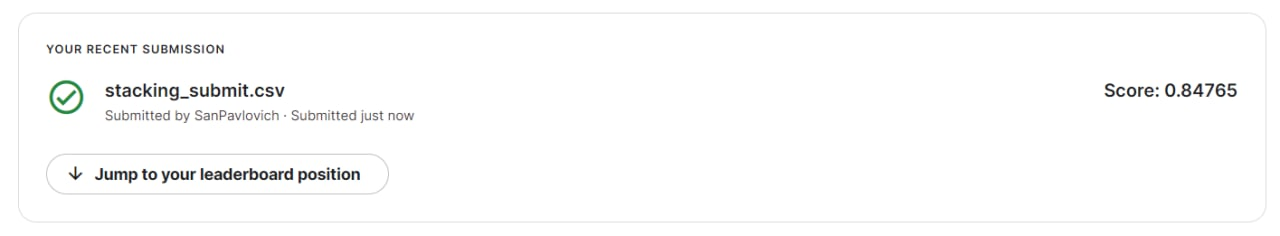

In [ ]:
from IPython.display import Image
Image('kaggle_result_stacking.jpg')

# Результат XGBoost

In [ ]:
best_model = xgboost.XGBClassifier(n_estimators=22, learning_rate=0.2)

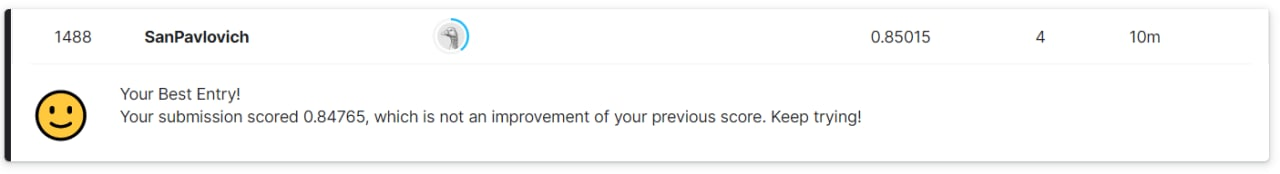

In [ ]:
Image('kaggle_best_result.jpg')

# Напоследок более детально поработаю с CatBoost'ом:

In [41]:
from sklearn.metrics import roc_curve

In [38]:
from catboost import Pool
from catboost import cv

In [39]:
def print_cv_summary(cv_data):
    cv_data.head(10)

    best_value = cv_data['test-AUC-mean'].max()
    best_iter = cv_data['test-AUC-mean'].values.argmax()

    print('Best validation AUC score : {:.4f}±{:.4f} on step {}'.format(
        best_value,
        cv_data['test-AUC-mean'][best_iter],
        best_iter)
    )

In [43]:
def boosting(data, cat_features):
    # признаки и целевой признак
    features = data.drop('Churn', axis=1)
    target = data['Churn']
    
    # разделение на выборки
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345) 
    
    # масштабирование
    scaler = StandardScaler()
    scaler.fit(features_train[num_cols]) 
    features_train[num_cols] = scaler.transform(features_train[num_cols])
    features_valid[num_cols] = scaler.transform(features_valid[num_cols])
    
    # Pool
    train_pool = Pool(data=features_train, label=target_train, cat_features=cat_features, has_header=True)
    
    # Создание модели для подбора гиперпараметров
    model = CatBoostClassifier(
    eval_metric='AUC',
    iterations=100,
    random_seed=63,
    class_weights=(1,3))
    
    # Подбор гиперпараметров
    grid = {
    'learning_rate': [0.03, 0.1, 0.5],
    'depth':[4, 6, 10, 12],
    'l2_leaf_reg': [5, 7, 9, 11, 13]
    }
    grid_search_results = model.grid_search(grid, train_pool, shuffle=False, verbose=3, plot=True)
    
    #Кросс-валидация:
    
        #Параметры:
    params = {
    'depth': grid_search_results['params']['depth'],
    'l2_leaf_reg': grid_search_results['params']['l2_leaf_reg'],
    'learning_rate': grid_search_results['params']['learning_rate'],
    'loss_function': 'Logloss',
    'iterations': 100,
    'custom_loss': 'AUC'
    }
        #Сама кросс-валидация:
    cv_data = cv(
    params = params,
    pool = train_pool,
    fold_count=5,
    shuffle=True,
    partition_random_seed=20,
    plot=True,
    stratified=False,
    verbose=False
    )    
    
    print_cv_summary(cv_data)
    
    # Сама модель
    model = CatBoostClassifier(
    depth =grid_search_results['params']['depth'],
    l2_leaf_reg=grid_search_results['params']['l2_leaf_reg'],
    learning_rate=grid_search_results['params']['learning_rate'],
    loss_function='Logloss',
    eval_metric='AUC',
    iterations=100,
    random_seed=63,
    class_weights=(1,3))
    
    # Обучение
    model.fit(features_train, target_train, cat_features=cat_features, verbose=10)
    
    # Расчеты
    pred_valid = model.predict_proba(features_valid)
    probabilities_one_valid = pred_valid[:, 1]
    roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
    
    #График
    plt.figure(figsize=(16, 8))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()
    
    return roc_auc, model

In [ ]:
auc, model = boosting(data, cat_cols)

отличный результат!

In [48]:
auc

0.843585868127716

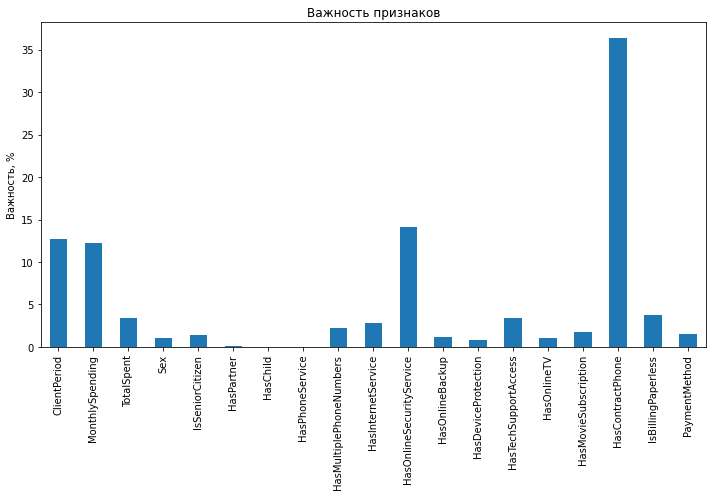

In [51]:
cat_imp = pd.Series(model.get_feature_importance(),
                         data.drop(['Churn'], axis=1).columns)
fig, ax = plt.subplots(figsize=(10,7))
cat_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность, %')
fig.tight_layout()

# Попробую обучить модель без наименее важный признаков

In [54]:
data_new = data.drop(['Sex', 'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasDeviceProtection','HasPhoneService'], axis=1)

In [64]:
cat_cols_new = ['HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService',
 'HasOnlineBackup',
 'HasTechSupportAccess',
 'HasOnlineTV',
 'HasMovieSubscription',
 'HasContractPhone',
 'IsBillingPaperless',
 'PaymentMethod']

In [ ]:
auc_new, model_new = boosting(data_new, cat_cols_new)

In [67]:
auc_new

0.8424397002330122

In [74]:
model_new.get_params()

{'iterations': 100,
 'learning_rate': 0.5,
 'depth': 4,
 'l2_leaf_reg': 11,
 'loss_function': 'Logloss',
 'random_seed': 63,
 'class_weights': (1, 3),
 'eval_metric': 'AUC'}